In [1]:
# Import necessary Packages
 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import mnist
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import keras.utils
import numpy as np

In [2]:
# Get the dataset

(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data() 	#Keras function

print ("fashion_mnist data downloaded...")

4423680/4422102 [==============================] - 0s 0us/step
fashion_mnist data downloaded...


In [4]:
# Find the unique numbers from the train labels
classes = np.unique(Y_train)
classes_num = len(classes)
print('Unique output classes : ', classes)
print('Total number of outputs : ', classes_num)

Unique output classes :  [0 1 2 3 4 5 6 7 8 9]
Total number of outputs :  10


In [5]:
#Filter classes for sandal and sneaker
L=[]#List for two classes sandal and sneaker
for i in range(len(Y_train)):
    if (Y_train[i]== 0 or  Y_train[i]== 9): 
        L.append(Y_train[i])
        #print(Y_train[i])

In [6]:
X_train=X_train[L]
Y_train=Y_train[L]
X_test=X_test[L]
Y_test=Y_test[L]

In [7]:
# Find the unique numbers from the train labels after applying filters
classes = np.unique(L )
classes_num = len(classes)
print('Unique output classes : ', classes)
print('Total number of outputs : ', classes_num)

Unique output classes :  [0 9]
Total number of outputs :  2


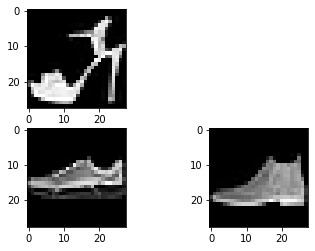

In [8]:
# This code cell is for visualization of data only...may be skipped

# plot images...subplot function is being used...nice documentation is available on the official webpage of matplotlib
# arguments to subplot functions are number of rows, number of columns and 
# number of subplots in the plot...comma is mandatory if values are less than 10

plt.subplot(221)	
plt.imshow(X_train[0], cmap=plt.get_cmap('gray')) # ploting first image of training data set
#plt.subplot(222)
#plt.imshow(X_train[9], cmap=plt.get_cmap('gray'))	# ploting 10th image in training data set
plt.subplot(223)
plt.imshow(X_test[11], cmap=plt.get_cmap('gray'))	# ploting 12rth image of test date set
plt.subplot(224)
plt.imshow(X_test[12], cmap=plt.get_cmap('gray'))	# ploting 13th image of test data set

# show the plot
plt.show()

In [9]:
# Print shape of dataset..it will print three tuples, namely the no. of images in dataset, height and width(60000, 28, 28)

print (X_train.shape)

(12000, 28, 28)


In [10]:
print (Y_train.shape)

(12000,)


In [11]:
# Do basic preprocessing of the training data

# reshaping the data 
X_train = X_train.reshape(12000,28,28,1)
X_test = X_test.reshape(12000,28,28,1)

for_final_test = X_test # we will use this for running predictions

# Change the data type from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize the images
X_train /= 255
X_test /= 255

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print(X_train.shape[0], 'training samples')
print(X_test.shape[0], 'test samples')

X_train shape: (12000, 28, 28, 1)
X_test shape: (12000, 28, 28, 1)
12000 training samples
12000 test samples


In [12]:
# Convert the class labels to one hot encoded matrix

num_classes = 10 # number of classess for classification 

Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

print (Y_train.shape)

(12000, 10)


In [13]:
# Define model architecture

rows, cols = 28,28
input_shape = (rows, cols, 1)
model = Sequential()

#arch 1
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) #Flattens the input, Why ? because we need to connect it to Dense layer
model.add(Dense(num_classes, activation='softmax'))

# another architecture...you may experiment with the following architecture
#arch 2
#model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
#model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
#model.add(Flatten()) # Flattens the input
#model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(num_classes, activation='softmax'))

print ("keep going...")

keep going...


In [14]:
# Once a model is "built", summary() method can be used to display its contents:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                92170     
Total params: 110,986
Trainable params: 110,986
Non-trainable params: 0
_________________________________________________________________


In [15]:
# compiling model

model.compile(loss='categorical_crossentropy', optimizer='Adadelta', metrics=['accuracy'])

print ("compile successful...")

compile successful...


In [16]:
# print model summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                92170     
Total params: 110,986
Trainable params: 110,986
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
# Now we train the model

batch_size = 128
epochs = 8

# start the training

history=model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.2)

print ("training done...")

Epoch 1/8
75/75 [==============================] - 18s 236ms/step - loss: 2.1385 - accuracy: 0.4945 - val_loss: 2.0880 - val_accuracy: 0.4929
Epoch 2/8
75/75 [==============================] - 17s 231ms/step - loss: 2.0692 - accuracy: 0.5008 - val_loss: 2.0145 - val_accuracy: 0.4929
Epoch 3/8
75/75 [==============================] - 17s 229ms/step - loss: 1.9942 - accuracy: 0.5005 - val_loss: 1.9344 - val_accuracy: 0.4929
Epoch 4/8
75/75 [==============================] - 17s 230ms/step - loss: 1.9116 - accuracy: 0.5135 - val_loss: 1.8462 - val_accuracy: 0.4929
Epoch 5/8
75/75 [==============================] - 17s 231ms/step - loss: 1.8216 - accuracy: 0.6886 - val_loss: 1.7459 - val_accuracy: 1.0000
Epoch 6/8
75/75 [==============================] - 17s 227ms/step - loss: 1.7184 - accuracy: 1.0000 - val_loss: 1.6323 - val_accuracy: 1.0000
Epoch 7/8
75/75 [==============================] - 17s 229ms/step - loss: 1.6013 - accuracy: 1.0000 - val_loss: 1.5040 - val_accuracy: 1.0000
Epoch 

In [18]:
# Evaluate the model

score = model.evaluate(X_test, Y_test, verbose=1)
print('loss:', score[0])
print('accuracy:', score[1])

375/375 [==============================] - 6s 17ms/step - loss: 2.0832 - accuracy: 0.5000
loss: 2.0831871032714844
accuracy: 0.5


In [19]:
#printing metrices
print (model.metrics_names)

# list all data in history
print(history.history.keys())

['loss', 'accuracy']
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [20]:
# about training 
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

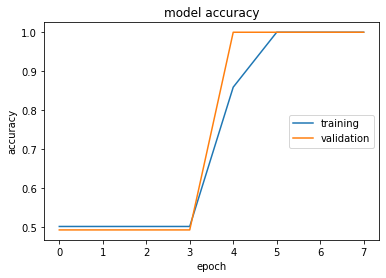

In [21]:
# to visualize the performance with plots...plot loss and accuracy in training and validation 

# Plot for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='center right')
plt.show()

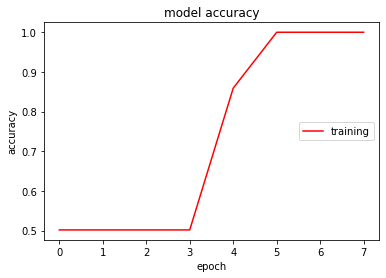

In [22]:
# Accuracy with the epochs

plt.plot(history.history['accuracy'],'r')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training'], loc='center right')
plt.show()

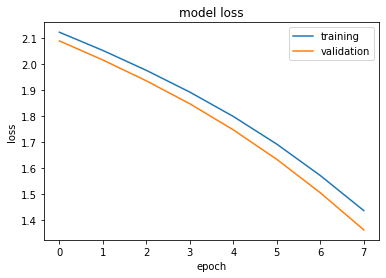

In [23]:
# summarize history for loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

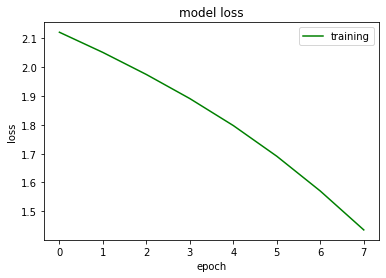

In [24]:
# Loss with epochs

plt.plot(history.history['loss'],'g')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training'], loc='upper right')
plt.show()